# Etudes des valeurs foncières Française
### Liens: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [81]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import missingno as msno

#### Chargement du fichiers des valeurs foncières de 2018

In [82]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y') # 03/01/2018
types = {'No voie':'category', 
         'Type de voie':'category',
         'Code postal': 'category',
         'Nature mutation': 'category',
         'Commune':'category'
        }


df = pd.read_csv('valeursfoncieres-2018.txt', sep='|', decimal=",", parse_dates=['Date mutation'], date_parser=dateparse,
                 dtype=types)

/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
df.describe()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,Code commune,...,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.059537e+06,3.031420e+06,3.059537e+06,...,6335.000000,11113.000000,1679.000000,692.000000,3.059537e+06,1.600879e+06,0.0,1.598359e+06,1.598359e+06,2.113094e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226614e+00,8.052352e+05,2.106752e+02,...,86.268249,161.796995,120.495747,124.533757,3.887990e-01,2.001269e+00,NaN,8.908261e+01,2.420266e+00,3.142064e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.186802e+00,1.256333e+07,1.686545e+02,...,247.014792,2307.553061,370.563012,419.637928,8.309734e-01,9.494939e-01,NaN,7.226763e+02,2.095140e+00,1.470640e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.500000e-01,1.000000e+00,...,0.400000,2.000000,0.400000,0.600000,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,5.500000e+04,7.500000e+01,...,39.310000,7.000000,37.000000,30.707500,0.000000e+00,1.000000e+00,NaN,1.200000e+01,0.000000e+00,2.370000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.420000e+05,1.740000e+02,...,61.690000,23.000000,67.000000,61.275000,0.000000e+00,2.000000e+00,NaN,6.000000e+01,3.000000e+00,6.280000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.570000e+05,3.000000e+02,...,88.520000,67.000000,106.740000,113.175000,1.000000e+00,3.000000e+00,NaN,9.400000e+01,4.000000e+00,1.935000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.620000e+02,1.256966e+09,9.090000e+02,...,8284.000000,161313.000000,4331.400000,8188.000000,3.300000e+02,4.000000e+00,NaN,2.778140e+05,9.000000e+01,4.625500e+06


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059537 entries, 0 to 3059536
Data columns (total 43 columns):
Code service CH               float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                int64
Date mutation                 datetime64[ns]
Nature mutation               category
Valeur fonciere               float64
No voie                       category
B/T/Q                         object
Type de voie                  category
Code voie                     object
Voie                          object
Code postal                   category
Commune                       category
Code departement              object
Code commune                  int64
Prefixe de section            float64
Section                       object
No plan                       int64
No Volume   

In [85]:
df.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018-01-03,Vente,...,NaN,2,2.0,Appartement,NaN,73.0,4.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018-01-03,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018-01-04,Vente,...,NaN,0,1.0,Maison,NaN,163.0,4.0,S,NaN,949.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018-01-04,Vente,...,NaN,0,1.0,Maison,NaN,51.0,2.0,AG,JARD,420.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018-01-04,Vente,...,NaN,0,1.0,Maison,NaN,51.0,2.0,S,NaN,949.0


In [86]:
df.dtypes.value_counts()

float64           20
object            13
int64              4
category           1
datetime64[ns]     1
category           1
category           1
category           1
category           1
dtype: int64

#### Analyse des données manquantes

In [87]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(), 'Manquant %':round((df.isnull().sum()/len(df))*100, 2), 'Type':df.dtypes}
    analysis_df = pd.DataFrame(analysis)
    print(analysis_df.sort_values('Manquant %', ascending=False))
    #sns.heatmap(df.isnull())

def get_mixed_type(df):
    for col in df.columns:
        weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
        if len(df[weird]) > 0:
            print(col, df.columns.get_loc(col))

In [88]:
missing_values_assessment(df)

Nombre d'observations: 3,059,537
Nombre de valeurs: 131,560,091
Valeurs manquantes: 75,853,849
Qualité des données: 42.34%
Type de données:
 float64           20
object            13
int64              4
category           1
datetime64[ns]     1
category           1
category           1
category           1
category           1
dtype: int64%
                            Manquant  Manquant %            Type
Code service CH              3059537      100.00         float64
4 Articles CGI               3059537      100.00         float64
Reference document           3059537      100.00         float64
5 Articles CGI               3059537      100.00         float64
Identifiant local            3059537      100.00         float64
3 Articles CGI               3059537      100.00         float64
2 Articles CGI               3059537      100.00         float64
1 Articles CGI               3059537      100.00         float64
Surface Carrez du 5eme lot   3058845       99.98         float64
Surfac

#### Supression des colonnes sans données

In [89]:
# Drop NaN columns
initial_length = len(df.columns)
df.dropna(how='all', axis=1, inplace=True)
print("Suppression de {} colonnes sans données".format(initial_length-len(df.columns)))

Suppression de 8 colonnes sans données


#### Suppression des lignes en double

In [90]:
# Drop duplicates
initial_length = len(df)
df.drop_duplicates(inplace=True)
print("Suppression des doublons: {}".format(initial_length-len(df)))

Suppression des doublons: 108687


#### Suppression des colonnes sans intérêt pour notre étude

In [91]:
df.drop(['Voie', 'B/T/Q'],axis=1, inplace=True)

# Référence cadastrale de la parcelle
df.drop(['Code departement', 'Prefixe de section', 'Section', 'No plan'],axis=1, inplace=True) # Garde 'Code commune'

# No de disposition
df.drop(['No disposition'],axis=1, inplace=True)
# No de volume
df.drop(['No Volume'],axis=1, inplace=True)

# Nature culture (référence à un document externe)
df.drop(['Nature culture speciale', 'Nature culture'],axis=1, inplace=True)

# Suppression du 'Type local' en doublon avec le 'Code Type Local'
df.drop(['Type local'],axis=1, inplace=True)

# Suppression du 'Code voie'
df.drop(['Code voie'],axis=1, inplace=True)

# Suppression du 'No voie'
df.drop(['No voie'],axis=1, inplace=True)

# Suppression de la 'Date mutation'
df.drop(['Date mutation'],axis=1, inplace=True)

# Suppression de la 'Code commune' en doublon avec la categorie 'Commune'
df.drop(['Code commune'],axis=1, inplace=True)
# Suppression de 'Commune' en doublon avec Code postal
df.drop(['Commune'],axis=1, inplace=True)

# Suppression des 'lot' - !! A reintroduire après une 1ére analyse
df.drop(['5eme lot'],axis=1, inplace=True)
df.drop(['4eme lot'],axis=1, inplace=True)
df.drop(['3eme lot'],axis=1, inplace=True)
df.drop(['2eme lot'],axis=1, inplace=True)
df.drop(['1er lot'],axis=1, inplace=True)


In [92]:
# Suppression des lignes où il n'y a pas de 'valeurs foncières'
indexNames = df[df['Valeur fonciere'].isnull()].index
df.drop(indexNames, inplace=True)

In [93]:
# Remplissage des mètres Carrez manquant avec zéro
#df = df[df['Nombre de lots']<=5].dropna(how='all', axis=1)
df['Surface Carrez du 5eme lot'].fillna(0, inplace=True)
df['Surface Carrez du 4eme lot'].fillna(0, inplace=True)
df['Surface Carrez du 3eme lot'].fillna(0, inplace=True)
df['Surface Carrez du 2eme lot'].fillna(0, inplace=True)
df['Surface Carrez du 1er lot'].fillna(0, inplace=True)
df['Surface reelle bati'].fillna(0, inplace=True)
df['Surface terrain'].fillna(0, inplace=True)

In [94]:
missing_values_assessment(df)

Nombre d'observations: 2,927,795
Nombre de valeurs: 40,989,130
Valeurs manquantes: 4,183,725
Qualité des données: 89.78999999999999%
Type de données:
 float64     10
category     1
int64        1
category     1
category     1
dtype: int64%
                            Manquant  Manquant %      Type
Nombre pieces principales    1430181       48.85   float64
Code type local              1428119       48.78   float64
Type de voie                 1295428       44.25  category
Code postal                    29997        1.02  category
Nature mutation                    0        0.00  category
Valeur fonciere                    0        0.00   float64
Surface Carrez du 1er lot          0        0.00   float64
Surface Carrez du 2eme lot         0        0.00   float64
Surface Carrez du 3eme lot         0        0.00   float64
Surface Carrez du 4eme lot         0        0.00   float64
Surface Carrez du 5eme lot         0        0.00   float64
Nombre de lots                     0        0.00    

#### Analyse graphique des données manquantes

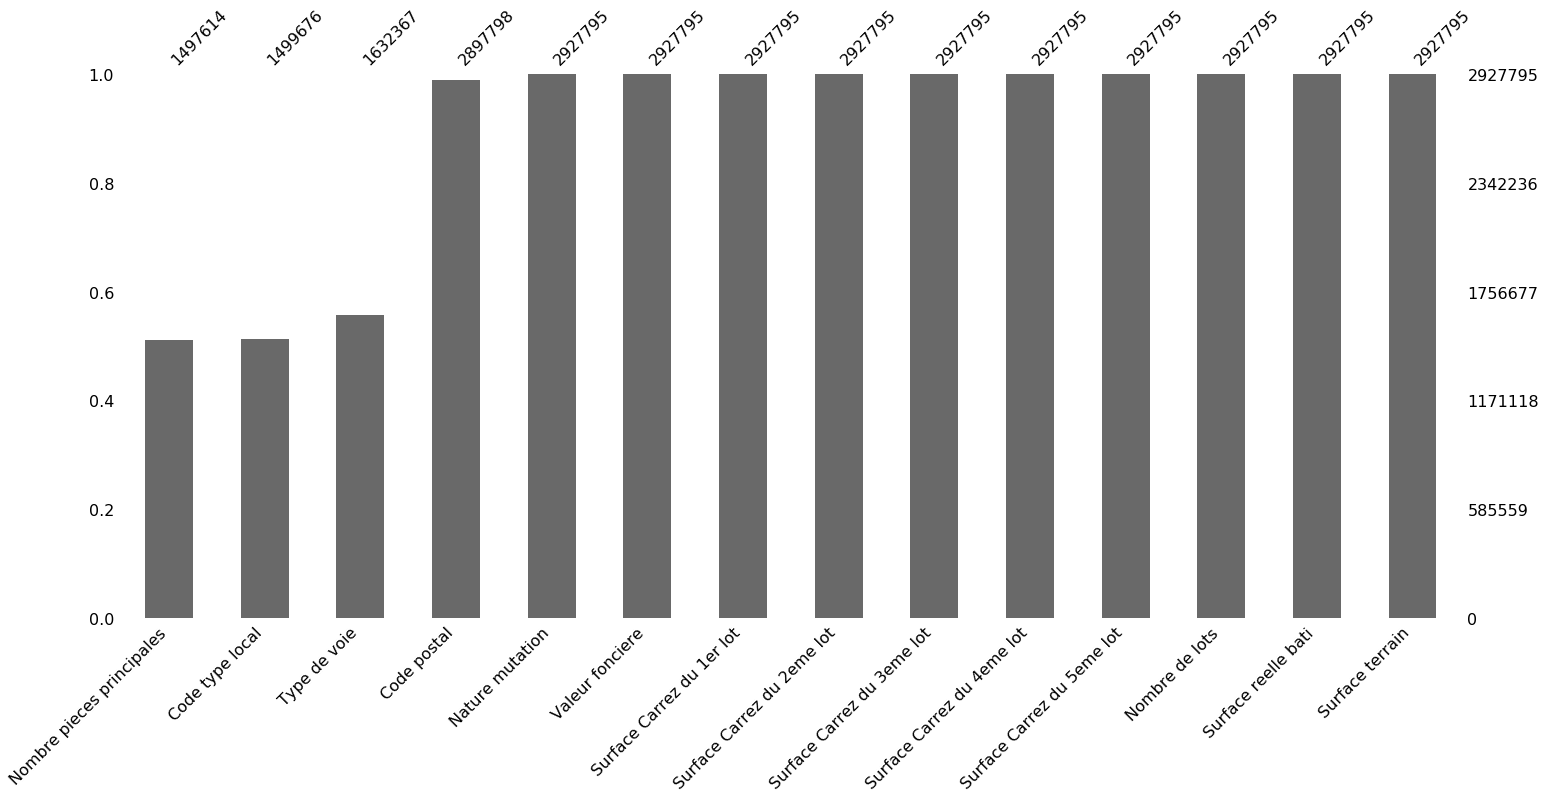

In [95]:
msno.bar(df, sort='ascending')

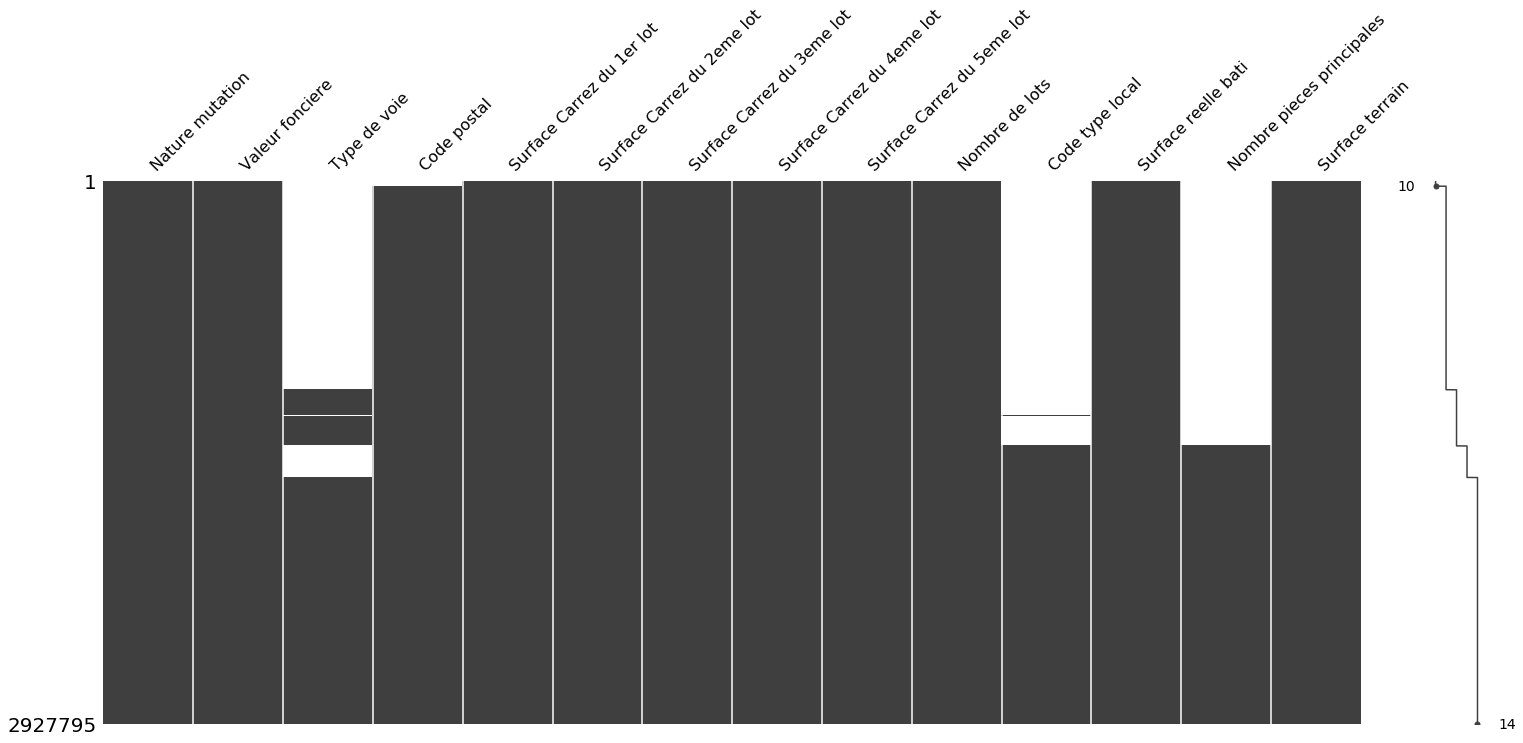

In [96]:
msno.matrix(df, sort='ascending')

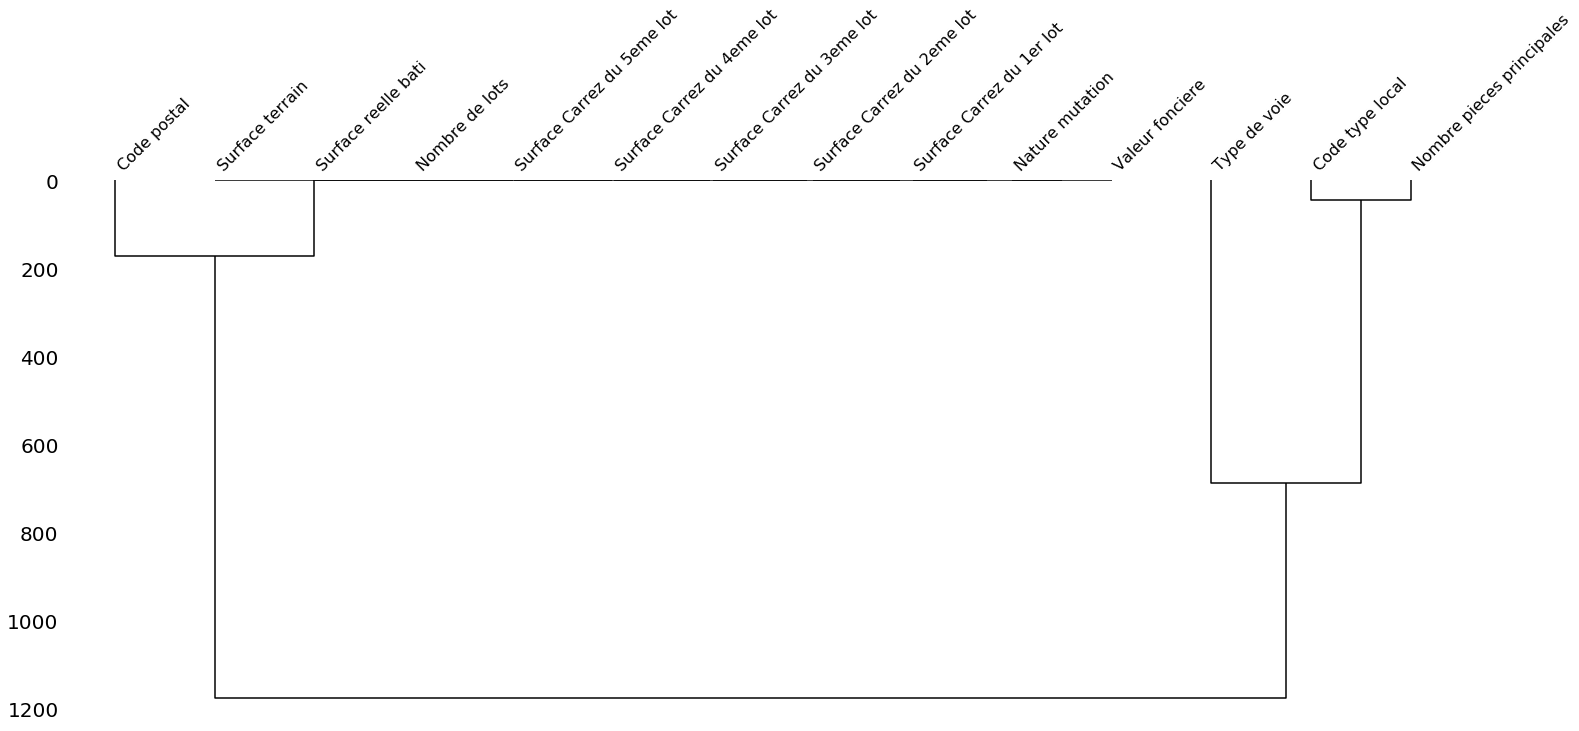

In [97]:
msno.dendrogram(df)

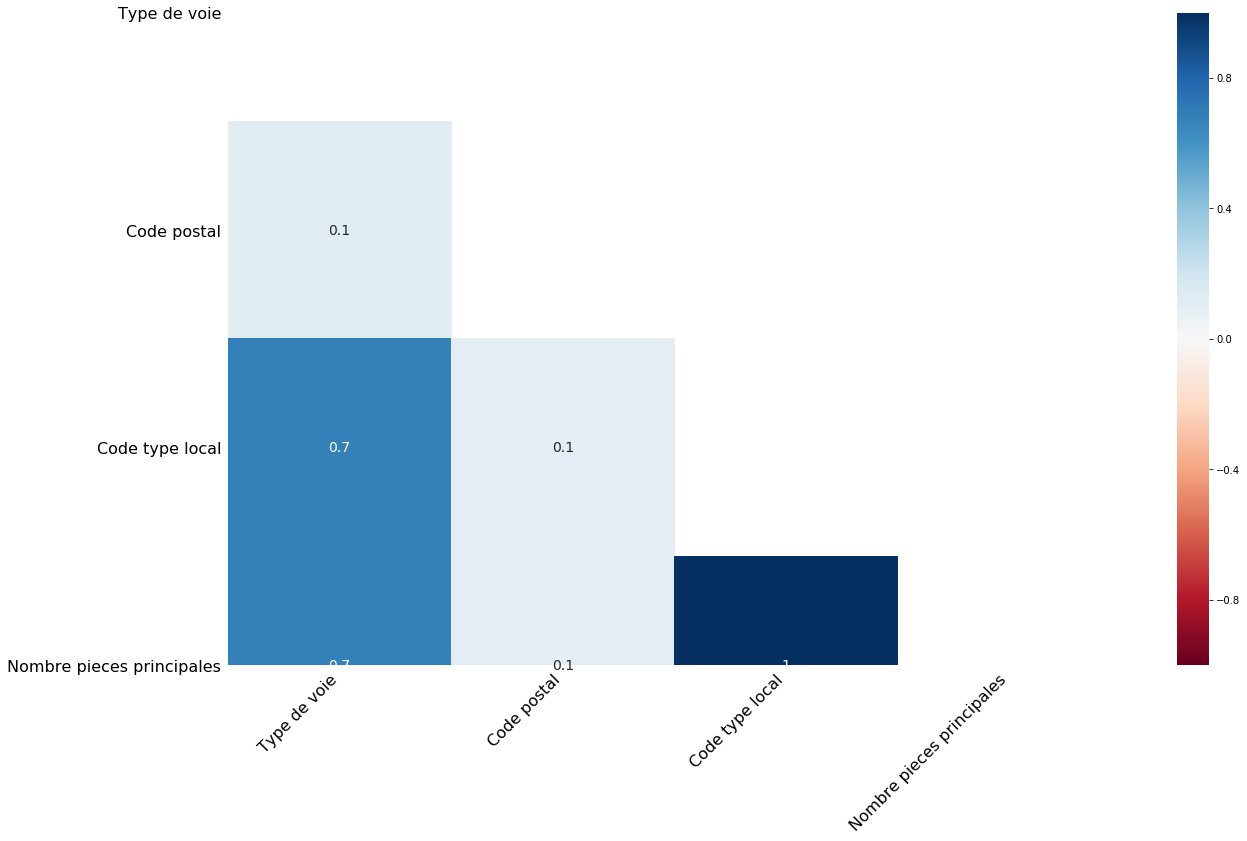

In [98]:
msno.heatmap(df)

## Nettoyage de données fonctionnels

In [99]:
category_cols = df.select_dtypes(include=['object','category'])

In [100]:
category_cols

,Nature mutation,Type de voie,Code postal
0,Vente,RUE,1000
1,Vente,RUE,1000
2,Vente,RUE,1250
3,Vente,RUE,1250
4,Vente,RUE,1250
...,...,...,...
3059532,Vente,RUE,75004
3059533,Vente,PAS,75002
3059534,Vente,RUE,75002
3059535,Vente,RUE,75004


In [101]:
for cat in category_cols.columns:
    cat_val = df[cat].unique().categories.values
    print('{} ({}):'.format(cat,len(cat_val)))
    print('{}\n'.format(cat_val))

Nature mutation (6):
['Vente' "Vente en l'état futur d'achèvement" 'Echange'
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']

Type de voie (137):
['RUE' 'ALL' 'AV' 'RTE' 'PL' 'QUAI' 'BD' 'SEN' 'CHE' 'IMP' 'CHEM' 'LOT'
 'GR' 'CLOS' 'PAS' 'PROM' 'VC' 'RLE' 'CRS' 'MTE' 'MAIL' 'PLA' 'RES' 'COUR'
 'VIA' 'VOIE' 'ESPA' 'PONT' 'HAM' 'D' 'CITE' 'N' 'ZA' 'PTR' 'CAR' 'PCH'
 'FG' 'ZAC' 'CHS' 'RUET' 'PARC' 'SQ' 'RPE' 'CR' 'ESC' 'REM' 'VCHE' 'COTE'
 'PTE' 'ZI' 'CD' 'RPT' 'DOM' 'VGE' 'QUA' 'PASS' 'TRA' 'DIG' 'TOUR' 'ESP'
 'COR' 'ART' 'DSC' 'HLM' 'ILOT' 'ACH' 'CAMI' 'PAE' 'VALL' 'RAC' 'VAL'
 'BRTL' 'CALL' 'PTTE' 'VTE' 'RTD' 'MRN' 'PLE' 'VEN' 'GPL' 'VLA' 'TRT'
 'ENC' 'MAIS' 'TSSE' 'AUT' 'CAE' 'CTRE' 'ZONE' 'MAR' 'PLAG' 'RUIS' 'HAB'
 'DRA' 'CHV' 'PLAN' 'EMBR' 'PORT' 'BSN' 'BRG' 'CPG' 'LEVE' 'CC' 'PRT'
 'PLCI' 'PRV' 'VIL' 'RIVE' 'ANGL' 'ZAD' 'ROC' 'GAL' 'PTA' 'FOS' 'PIST'
 'CHT' 'CTR' 'PKG' 'LIGN' 'FRM' 'BER' 'CRX' 'RULT' 'ZUP' 'CASR' 'CORO'
 'BRE' 'NTE' 'CHL' 'VOY' 'LICE' 'COL' 'CF' 'VOIR' 'GAR

### Catégories

In [102]:
def encode_cat(df, col):
    df[col] = df[col].astype('category')
    df = pd.get_dummies(df, prefix=encode_label(col), columns=col)
    return df.drop(col,axis=1)

def encode_label(label):
    return label.replace(' ','_').lower()

In [103]:
df = pd.get_dummies(df, columns=['Nature mutation'])
df = pd.get_dummies(df, columns=['Type de voie'])

In [104]:
df.head()

,Valeur fonciere,Code postal,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,...,Type de voie_NTE,Type de voie_CHL,Type de voie_VOY,Type de voie_LICE,Type de voie_COL,Type de voie_CF,Type de voie_VOIR,Type de voie_GARE,Type de voie_JARD,Type de voie_BORD
0,109000.0,1000,0.0,0.0,0.0,0.0,0.0,2,2.0,73.0,...,0,0,0,0,0,0,0,0,0,0
1,109000.0,1000,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,239300.0,1250,0.0,0.0,0.0,0.0,0.0,0,1.0,163.0,...,0,0,0,0,0,0,0,0,0,0
3,239300.0,1250,0.0,0.0,0.0,0.0,0.0,0,1.0,51.0,...,0,0,0,0,0,0,0,0,0,0
4,239300.0,1250,0.0,0.0,0.0,0.0,0.0,0,1.0,51.0,...,0,0,0,0,0,0,0,0,0,0


#### Renomme les colonnes

In [105]:
import unidecode

columns = {}
for index, column_name in enumerate(df.columns):
    columns[column_name] = unidecode.unidecode(column_name.replace(' ','_').replace('\'','_').lower())
df.rename(columns=columns, inplace=True)

In [106]:
df.head()

,valeur_fonciere,code_postal,surface_carrez_du_1er_lot,surface_carrez_du_2eme_lot,surface_carrez_du_3eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,surface_reelle_bati,...,type_de_voie_nte,type_de_voie_chl,type_de_voie_voy,type_de_voie_lice,type_de_voie_col,type_de_voie_cf,type_de_voie_voir,type_de_voie_gare,type_de_voie_jard,type_de_voie_bord
0,109000.0,1000,0.0,0.0,0.0,0.0,0.0,2,2.0,73.0,...,0,0,0,0,0,0,0,0,0,0
1,109000.0,1000,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,239300.0,1250,0.0,0.0,0.0,0.0,0.0,0,1.0,163.0,...,0,0,0,0,0,0,0,0,0,0
3,239300.0,1250,0.0,0.0,0.0,0.0,0.0,0,1.0,51.0,...,0,0,0,0,0,0,0,0,0,0
4,239300.0,1250,0.0,0.0,0.0,0.0,0.0,0,1.0,51.0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
### Temporaire
df.drop(['code_postal'],axis=1, inplace=True) # Dois utiliser target encoder
df.drop(['nombre_pieces_principales'],axis=1, inplace=True) # 
df.drop(['code_type_local'],axis=1, inplace=True)

In [108]:
## Sanity Check
missing_values_assessment(df)

Nombre d'observations: 2,927,795
Nombre de valeurs: 445,024,840
Valeurs manquantes: 0
Qualité des données: 100.0%
Type de données:
 uint8      143
float64      8
int64        1
dtype: int64%
                   Manquant  Manquant %     Type
valeur_fonciere           0         0.0  float64
type_de_voie_mar          0         0.0    uint8
type_de_voie_aut          0         0.0    uint8
type_de_voie_enc          0         0.0    uint8
type_de_voie_mais         0         0.0    uint8
...                     ...         ...      ...
type_de_voie_pch          0         0.0    uint8
type_de_voie_ptr          0         0.0    uint8
type_de_voie_ruet         0         0.0    uint8
type_de_voie_sq           0         0.0    uint8
type_de_voie_bord         0         0.0    uint8

[152 rows x 3 columns]


## Start ML

#### Découpage des données pour l'entraînement et l'évaluation de l'apprentissage automatique

In [113]:
from sklearn.model_selection import train_test_split

y = df['valeur_fonciere']
X = df.drop(['valeur_fonciere'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

(1961622, 151)
(1961622,)


#### Régression linéaire

In [225]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.005956933019400258

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_reg = LinearRegression()
cv_results = cross_val_score(cv_reg, X, y, cv=100)
print(cv_results)

In [ ]:
np.mean(cv_results)

#### Régression linéaire avec Lasso

In [114]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train,y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

#### Filtre sur l'importance des features

In [221]:
lasso_df = pd.DataFrame(np.array([lasso.coef_]), columns=X.columns)

for col in lasso_df.columns:
    if lasso_df[col].iloc[0]<1000:
        lasso_df.drop(col, axis=1, inplace=True)

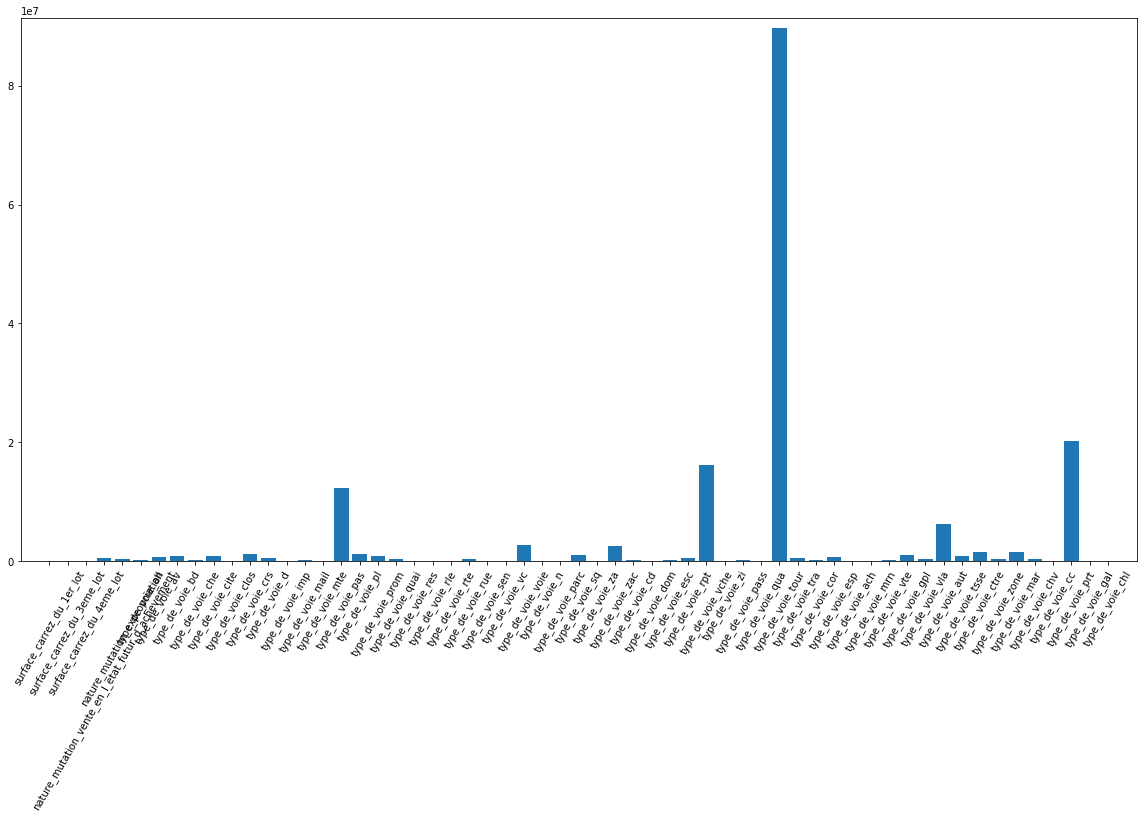

In [222]:
col_rang = range(len(lasso_df.columns))

plt.figure(figsize=(20,10))
plt.bar(col_rang, lasso_df.iloc[0])
plt.xticks(col_rang, lasso_df.columns, rotation=60)
plt.margins(0.02)
plt.show()